# 0. Intro

#### This dataset provides us information about 150 000 users in train dataset. and our task is to predict probability of default ('SeriousDlqin2yrs' column).
link:
https://www.kaggle.com/competitions/GiveMeSomeCredit/overview

#### This notebook includes:
- EDA with different visualizations.
- data preprocessing before using models.
- Grouping customers into clusters using various clustering models.
- Perform interpretation and analysis of classification that have been created.

In [1]:
# Necessary libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20,15
import seaborn as sns
sns.set_palette(palette='viridis')

# df output optimization for cases if we want to print lots of data:
pd.set_option('display.notebook_repr_html', True)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 100)

import warnings
warnings.filterwarnings('ignore')

# 1. EDA

In [2]:
df=pd.read_csv('cs-training.csv')
df.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


So, we can notice that there are some variables with strange distribution with extralarge max values: 
- RevolvingUtilizationOfUnsecuredLines	
- DebtRatio
- MonthlyIncome	

strange, but questionable, currently we are not sure is it normal or not:
- NumberOfTimes90DaysLate
- NumberRealEstateLoansOrLines
- NumberOfTime60-89DaysPastDueNotWorse
- NumberOfTime30-59DaysPastDueNotWorse	

In [4]:
# data types checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
# missing values
df.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
y = df['SeriousDlqin2yrs']
X = df.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1)
X.head(2)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [7]:
y.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

# 2. Data preprocessing before using models.

#### In this dataset we have several problems that should be solved:
- outliers
- missing values
- unbalanced classes
- optional (only for regression): feature scaling

In [8]:
# unbalanced classes
rat = len(df.loc[df['SeriousDlqin2yrs']==0])//len(df.loc[df['SeriousDlqin2yrs']==1])
rat

13

In [9]:
df_1 = df.loc[df['SeriousDlqin2yrs']==1]
df_1 = df_1.loc[df_1.index.repeat(rat)]
df_12 = pd.concat([df.loc[df['SeriousDlqin2yrs']==0], df_1]).sample(frac=1)

In [10]:
# so we have to reinitiate X and y
y = df_12['SeriousDlqin2yrs']
X = df_12.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1)
X.head(2)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
124474,1.000000,63,0,0.034835,30600.0,4,1,0,0,1.0
63987,0.186466,47,0,0.183812,9846.0,11,0,1,0,1.0


In [11]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,270312.0,5.300179,205.791265,0.0,0.069398,0.424414,0.934052,50708.0
age,270312.0,49.460627,14.330062,0.0,39.000000,49.000000,59.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,270312.0,1.296720,8.484865,0.0,0.000000,0.000000,1.000000,98.0
DebtRatio,270312.0,327.241732,1728.497975,0.0,0.182882,0.391497,0.882593,329664.0
MonthlyIncome,220553.0,6197.615276,11420.113272,0.0,3124.000000,5000.000000,7600.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,270312.0,8.198859,5.385156,0.0,4.000000,7.000000,11.000000,58.0
NumberOfTimes90DaysLate,270312.0,1.078428,8.488011,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,270312.0,1.005016,1.270091,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,270312.0,0.947032,8.466360,0.0,0.000000,0.000000,0.000000,98.0
NumberOfDependents,264240.0,0.842628,1.166717,0.0,0.000000,0.000000,2.000000,20.0


In [12]:
# outliers and missing values (NaNs)
def outlier(X):
    q1 = X.quantile(0.01)
    q3 = X.quantile(0.99)
    iqr = q3-q1
    lqi = q1 #- 1.5*iqr
    hqi = q3 #+ 1.5*iqr 
    X[(X > hqi)| (X < lqi) ] = np.nan #
    X.isna().sum()
    X = X.fillna(X.median())
    return X

In [13]:
X = outlier(X)

In [14]:
X.isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# 3. Models

In [16]:
# tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# metrics
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, r2_score, confusion_matrix
from sklearn.metrics import classification_report

#### 3.1 Logistic Regression. Main advantage: interpretability

In [17]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [18]:
grid={"C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], "penalty":['none', 'l1', 'l2', 
                                                                  'elasticnet']
     , 'solver': ('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga')
    }# l1 lasso l2 ridge
logreg_cv=GridSearchCV(estimator=LogisticRegression(),
                           param_grid=grid, cv=5,
                            scoring='roc_auc', n_jobs=-1, verbose=10
                       
                           )
lr_cv = logreg_cv.fit(X_train,y_train)
y_pred = logreg_cv.predict(X_test)
roc_auc = roc_auc_score(y_pred, y_test)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("roc_auc train:",logreg_cv.best_score_, '\n',
     'roc_auc test:', roc_auc)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cholesky'}
roc_auc train: 0.8538003287117707 
 roc_auc test: 0.771872135853729


In [19]:
print(classification_report(y_pred, y_test), 'outliers boundaries 0,99/0,01')

              precision    recall  f1-score   support

           0       0.82      0.76      0.79     15071
           1       0.72      0.79      0.75     11961

    accuracy                           0.77     27032
   macro avg       0.77      0.77      0.77     27032
weighted avg       0.77      0.77      0.77     27032
 outliers boundaries 0,99/0,01


Text(120.72222222222221, 0.5, 'Ground Truth')

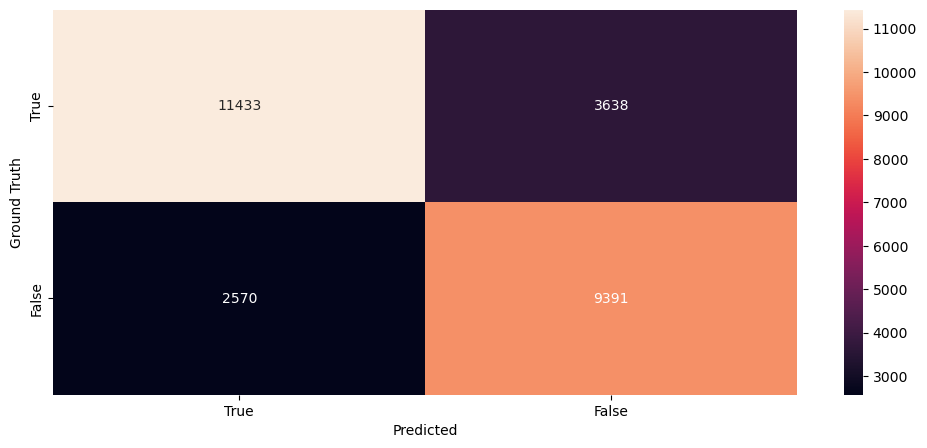

In [20]:
plt.figure(figsize=(12,5))
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')


labelsx=['True','False']
labels=['True','False']
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labels)

ax.set_xlabel('Predicted')
ax.set_ylabel('Ground Truth')

In [21]:
#lr_cv.coef_, lr_cv.intercept_
coef = logreg_cv.best_estimator_.coef_
intercept = logreg_cv.best_estimator_.intercept_

In [22]:
coef = pd.DataFrame(coef).T
names = pd.DataFrame(X_train.columns)

interpretation = pd.concat([names, coef],axis=1)

In [23]:
interpretation.columns = ['Feature', 'Coefficient']
interpretation.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
0,RevolvingUtilizationOfUnsecuredLines,2.092987
6,NumberOfTimes90DaysLate,0.996434
8,NumberOfTime60-89DaysPastDueNotWorse,0.942614
2,NumberOfTime30-59DaysPastDueNotWorse,0.590902
7,NumberRealEstateLoansOrLines,0.085764
5,NumberOfOpenCreditLinesAndLoans,0.040457
9,NumberOfDependents,0.025141
4,MonthlyIncome,-0.000043
3,DebtRatio,-0.000138
1,age,-0.020327


#### 3.2 Random forest

In [19]:
parameters = {'n_estimators': [20, 200], 'max_depth': [2,30]} #200 20

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_g = GridSearchCV(estimator=rf, param_grid = parameters, cv = 5, n_jobs=-1, scoring='roc_auc')
model = rf_g.fit(X_train, y_train)
y_pred=model.predict(X_test);
print('roc_auc train:', model.best_score_)
print('roc_auc test:', roc_auc_score(y_pred, y_test))
print('parameters:', rf_g.best_params_)

roc_auc train: 0.9998870990203221
roc_auc test: 0.9847065931576164
parameters: {'max_depth': 30, 'n_estimators': 200}


In [20]:
print(classification_report(y_pred, y_test), 'outliers boundaries 0,99/0,01')

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13791
           1       1.00      0.97      0.98     13241

    accuracy                           0.99     27032
   macro avg       0.99      0.98      0.98     27032
weighted avg       0.99      0.99      0.99     27032
 outliers boundaries 0,99/0,01


 #### 3.3 Boosting

In [24]:
# Catboost
cat = CatBoostClassifier()
parameters = {'learning_rate': [0.005,0.9, 0.001],
                  'subsample'    : [0.9, 0.1],
                  'n_estimators' : [20, 200],
                  'max_depth'    : [4,20]
              ,'early_stopping_rounds': [2,20]
                 }

grid_cat = GridSearchCV(estimator=cat, param_grid = parameters, cv = 5, n_jobs=-1, scoring='roc_auc')
cat_grid = grid_cat.fit(X_train, y_train)
y_pred=cat_grid.predict(X_test);
print('roc_auc train:', cat_grid.best_score_)
print('roc_auc test:', roc_auc_score(y_pred, y_test))
print("\n The best parameters across ALL searched params:\n", grid_cat.best_params_)

0:	learn: 0.4953174	total: 167ms	remaining: 33.2s
1:	learn: 0.4820687	total: 186ms	remaining: 18.4s
2:	learn: 0.4762526	total: 198ms	remaining: 13s
3:	learn: 0.4721090	total: 206ms	remaining: 10.1s
4:	learn: 0.4689711	total: 214ms	remaining: 8.35s
5:	learn: 0.4670233	total: 223ms	remaining: 7.19s
6:	learn: 0.4658175	total: 231ms	remaining: 6.36s
7:	learn: 0.4648146	total: 239ms	remaining: 5.74s
8:	learn: 0.4636585	total: 247ms	remaining: 5.24s
9:	learn: 0.4626087	total: 256ms	remaining: 4.86s
10:	learn: 0.4616785	total: 264ms	remaining: 4.54s
11:	learn: 0.4609041	total: 273ms	remaining: 4.27s
12:	learn: 0.4600899	total: 281ms	remaining: 4.05s
13:	learn: 0.4592231	total: 290ms	remaining: 3.85s
14:	learn: 0.4581537	total: 297ms	remaining: 3.67s
15:	learn: 0.4571687	total: 305ms	remaining: 3.51s
16:	learn: 0.4565058	total: 313ms	remaining: 3.37s
17:	learn: 0.4559649	total: 321ms	remaining: 3.25s
18:	learn: 0.4553447	total: 330ms	remaining: 3.14s
19:	learn: 0.4548950	total: 338ms	remaining

172:	learn: 0.4080346	total: 1.64s	remaining: 255ms
173:	learn: 0.4078438	total: 1.65s	remaining: 246ms
174:	learn: 0.4076202	total: 1.66s	remaining: 236ms
175:	learn: 0.4074341	total: 1.66s	remaining: 227ms
176:	learn: 0.4072567	total: 1.67s	remaining: 217ms
177:	learn: 0.4070529	total: 1.68s	remaining: 208ms
178:	learn: 0.4068747	total: 1.69s	remaining: 198ms
179:	learn: 0.4066473	total: 1.7s	remaining: 189ms
180:	learn: 0.4064435	total: 1.71s	remaining: 179ms
181:	learn: 0.4061841	total: 1.71s	remaining: 170ms
182:	learn: 0.4060128	total: 1.72s	remaining: 160ms
183:	learn: 0.4057374	total: 1.73s	remaining: 150ms
184:	learn: 0.4054698	total: 1.74s	remaining: 141ms
185:	learn: 0.4052826	total: 1.75s	remaining: 131ms
186:	learn: 0.4049396	total: 1.75s	remaining: 122ms
187:	learn: 0.4047575	total: 1.76s	remaining: 113ms
188:	learn: 0.4045402	total: 1.77s	remaining: 103ms
189:	learn: 0.4043146	total: 1.78s	remaining: 93.8ms
190:	learn: 0.4039599	total: 1.79s	remaining: 84.4ms
191:	learn:

In [25]:
print('Catboost', '\n', classification_report(y_pred, y_test), 'outliers boundaries 0,99/0,01')

Catboost 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     14003
           1       0.80      0.80      0.80     13029

    accuracy                           0.81     27032
   macro avg       0.81      0.81      0.81     27032
weighted avg       0.81      0.81      0.81     27032
 outliers boundaries 0,99/0,01


In [28]:
# XGB
xgb = XGBClassifier()
parameters = {'learning_rate': [0.001,0.1, 0.001],
                  'subsample'    : [0.9, 0.1],
                  'n_estimators' : [20, 200],
                  'max_depth'    : [2,10]
                 }

grid_xgb = GridSearchCV(estimator=xgb, param_grid = parameters, cv = 5, n_jobs=-2, scoring='roc_auc')
xgb_grid = grid_xgb.fit(X_train, y_train)
y_pred=xgb_grid.predict(X_test);
print('roc_auc train:', xgb_grid.best_score_)
print('roc_auc test:', roc_auc_score(y_pred, y_test))
print("\n The best parameters across ALL searched params:\n", grid_xgb.best_params_)

roc_auc train: 0.9600940154470294
roc_auc test: 0.8976452970291987

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.9}


In [30]:
print('XGB', '\n', classification_report(y_pred, y_test), 'outliers boundaries 0,99/0,01')

XGB 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     13686
           1       0.91      0.88      0.89     13346

    accuracy                           0.90     27032
   macro avg       0.90      0.90      0.90     27032
weighted avg       0.90      0.90      0.90     27032
 outliers boundaries 0,99/0,01


In [43]:
# GBC (sklearn)
gbc = GradientBoostingClassifier(learning_rate=0.1, subsample=0.9, n_estimators=200, max_depth=10)
parameters = {'learning_rate': [0.001,0.1, 0.001],
                  'subsample'    : [0.9, 0.1],
                  'n_estimators' : [20, 200],
                  'max_depth'    : [2,20]
                 }

grid_gbc = GridSearchCV(estimator=gbc, param_grid = parameters, cv = 3,n_jobs=-2,  scoring='roc_auc')
gbc_grid = grid_gbc.fit(X_train, y_train)
y_pred=gbc_grid.predict(X_test);
print('roc_auc train:', gbc_grid.best_score_)
print('roc_auc test:', roc_auc_score(y_pred, y_test))
print("\n The best parameters across ALL searched params:\n", grid_gbc.best_params_)

roc_auc test: 0.9097728543174003


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [44]:
print('GBC (sklearn)', '\n', classification_report(y_pred, y_test), 'outliers boundaries 0,99/0,01')

GBC (sklearn) 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     13661
           1       0.93      0.89      0.91     13371

    accuracy                           0.91     27032
   macro avg       0.91      0.91      0.91     27032
weighted avg       0.91      0.91      0.91     27032
 outliers boundaries 0,99/0,01


In [24]:
# LightGBM
lgbm = LGBMClassifier()
parameters = {'learning_rate': [0.001,0.1, 0.001],
                  'subsample'    : [0.9, 0.1],
                  'n_estimators' : [20, 100],
                  'max_depth'    : [4,10]
                 }

grid_lgbm = GridSearchCV(estimator=lgbm, param_grid = parameters, cv = 5, n_jobs=-1, scoring='roc_auc')
lgbm_grid = grid_lgbm.fit(X_train, y_train)
y_pred=lgbm_grid.predict(X_test);
print('roc_auc train:', lgbm_grid.best_score_)
print('roc_auc test:', roc_auc_score(y_pred, y_test))
print("\n The best parameters across ALL searched params:\n", grid_lgbm.best_params_)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 117502, number of negative: 125778
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 243280, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482991 -> initscore=-0.068063
[LightGBM] [Info] Start training from score -0.068063
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
roc_auc train: 0.8843897717060709
roc_auc test:

In [25]:
print('LightGBM', '\n', classification_report(y_pred, y_test), 'outliers boundaries 0,99/0,01')

LightGBM 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81     14266
           1       0.78      0.79      0.79     12766

    accuracy                           0.80     27032
   macro avg       0.80      0.80      0.80     27032
weighted avg       0.80      0.80      0.80     27032
 outliers boundaries 0,99/0,01


# 5. Final predictions

In [148]:
df_test=pd.read_csv('cs-test.csv')
df_test.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0
101502,101503,NaN,0.441842,29,0,0.198918,5916.0,12,0,0,0,0.0


In [149]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,101503.0,50752.000000,29301.536524,1.0,25376.500000,50752.000000,76127.500000,101503.0
SeriousDlqin2yrs,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RevolvingUtilizationOfUnsecuredLines,101503.0,5.310000,196.156039,0.0,0.030131,0.152586,0.564225,21821.0
age,101503.0,52.405436,14.779756,21.0,41.000000,52.000000,63.000000,104.0
NumberOfTime30-59DaysPastDueNotWorse,101503.0,0.453770,4.538487,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,101503.0,344.475020,1632.595231,0.0,0.173423,0.364260,0.851619,268326.0
MonthlyIncome,81400.0,6855.035590,36508.600375,0.0,3408.000000,5400.000000,8200.000000,7727000.0
NumberOfOpenCreditLinesAndLoans,101503.0,8.453514,5.144100,0.0,5.000000,8.000000,11.000000,85.0
NumberOfTimes90DaysLate,101503.0,0.296691,4.515859,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,101503.0,1.013074,1.110253,0.0,0.000000,1.000000,2.000000,37.0


In [150]:
df_test.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [151]:
X_tt = df_test.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1)

In [152]:
# outliers and missing values (NaNs)
#q1 = X.quantile(0.01)
#q3 = X.quantile(0.99)
#iqr = q3-q1
#lqi = q1 #- 1.5*iqr
#hqi = q3 #+ 1.5*iqr 
X_tt[(X_tt > hqi)| (X_tt < lqi) ] = np.nan #
X_tt.isna().sum()
X_tt = X_tt.fillna(X.median())
X_tt_s = ss.transform(X_tt)

In [153]:
X_tt.describe().T

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,101503.0,0.319139,0.351328,0.0,0.030131,0.152586,0.554007,1.462821
age,101503.0,52.083367,13.874697,24.0,42.000000,51.000000,62.000000,85.000000
NumberOfTime30-59DaysPastDueNotWorse,101503.0,0.240082,0.665250,0.0,0.000000,0.000000,0.000000,6.000000
DebtRatio,101503.0,266.993204,781.313125,0.0,0.173423,0.364260,0.791205,5075.000000
MonthlyIncome,101503.0,5889.714609,3463.314994,0.0,3900.000000,5000.000000,7200.000000,24167.000000
NumberOfOpenCreditLinesAndLoans,101503.0,8.271765,4.751001,0.0,5.000000,8.000000,11.000000,25.000000
NumberOfTimes90DaysLate,101503.0,0.086431,0.438901,0.0,0.000000,0.000000,0.000000,7.000000
NumberRealEstateLoansOrLines,101503.0,0.978178,0.975668,0.0,0.000000,1.000000,2.000000,5.000000
NumberOfTime60-89DaysPastDueNotWorse,101503.0,0.061249,0.303121,0.0,0.000000,0.000000,0.000000,4.000000
NumberOfDependents,101503.0,0.709959,1.046566,0.0,0.000000,0.000000,1.000000,4.000000


In [154]:
y_tt = xgb_grid.predict_proba(X_tt)[:,1]
y_tt = pd.DataFrame(y_tt)
y_tt

,0
0,0.235615
1,0.066204
2,0.167174
3,0.202345
4,0.691428
...,...
101498,0.282195
101499,0.631071
101500,0.054641
101501,0.245967


In [173]:
y_tt_rf = rf_g.predict_proba(X_tt)[:,1]
pd.DataFrame(y_tt_rf)

,0
0,0.324398
1,0.110980
2,0.040798
3,0.099882
4,0.554443
...,...
101498,0.099193
101499,0.651851
101500,0.026986
101501,0.136231


In [156]:
y_tt_lr = logreg_cv.predict_proba(X_tt_s)[:,1]
y_tt_lr = pd.DataFrame(y_tt_lr)
y_tt_lr

,0
0,0.537730
1,0.171200
2,0.017228
3,0.099033
4,0.688288
...,...
101498,0.050280
101499,0.914601
101500,0.016826
101501,0.319867


In [165]:
y_tt_xgb = grid_xgb.predict_proba(X_tt)[:,1]
y_tt_xgb = pd.DataFrame(y_tt_xgb)
y_tt_xgb

,0
0,0.222057
1,0.094784
2,0.059573
3,0.130989
4,0.442288
...,...
101498,0.147841
101499,0.822527
101500,0.004572
101501,0.226233


In [176]:
y_tt_gbc = grid_gbc.predict_proba(X_tt)[:,1]
y_tt_gbc = pd.DataFrame(y_tt_gbc)
y_tt_gbc

,0
0,0.353926
1,0.451017
2,0.084668
3,0.347300
4,0.580322
...,...
101498,0.476616
101499,0.923082
101500,0.030569
101501,0.196451


In [167]:
submission = pd.read_csv('sampleEntry.csv')
submission

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [169]:
submission['Probability']=y_tt_xgb
submission.to_csv('submitted_xgb.csv', index=False)
submission

,Id,Probability
0,1,0.222057
1,2,0.094784
2,3,0.059573
3,4,0.130989
4,5,0.442288
...,...,...
101498,101499,0.147841
101499,101500,0.822527
101500,101501,0.004572
101501,101502,0.226233


In [170]:
submission['Probability']=y_tt_lr
submission.to_csv('submitted_lr.csv', index=False)
submission

,Id,Probability
0,1,0.537730
1,2,0.171200
2,3,0.017228
3,4,0.099033
4,5,0.688288
...,...,...
101498,101499,0.050280
101499,101500,0.914601
101500,101501,0.016826
101501,101502,0.319867


In [174]:
submission['Probability']=y_tt_rf
submission.to_csv('submitted_rf.csv', index=False)
submission

,Id,Probability
0,1,0.324398
1,2,0.110980
2,3,0.040798
3,4,0.099882
4,5,0.554443
...,...,...
101498,101499,0.099193
101499,101500,0.651851
101500,101501,0.026986
101501,101502,0.136231


In [177]:
submission['Probability']=y_tt_gbc
submission.to_csv('submitted_gbc.csv', index=False)
submission

,Id,Probability
0,1,0.353926
1,2,0.451017
2,3,0.084668
3,4,0.347300
4,5,0.580322
...,...,...
101498,101499,0.476616
101499,101500,0.923082
101500,101501,0.030569
101501,101502,0.196451


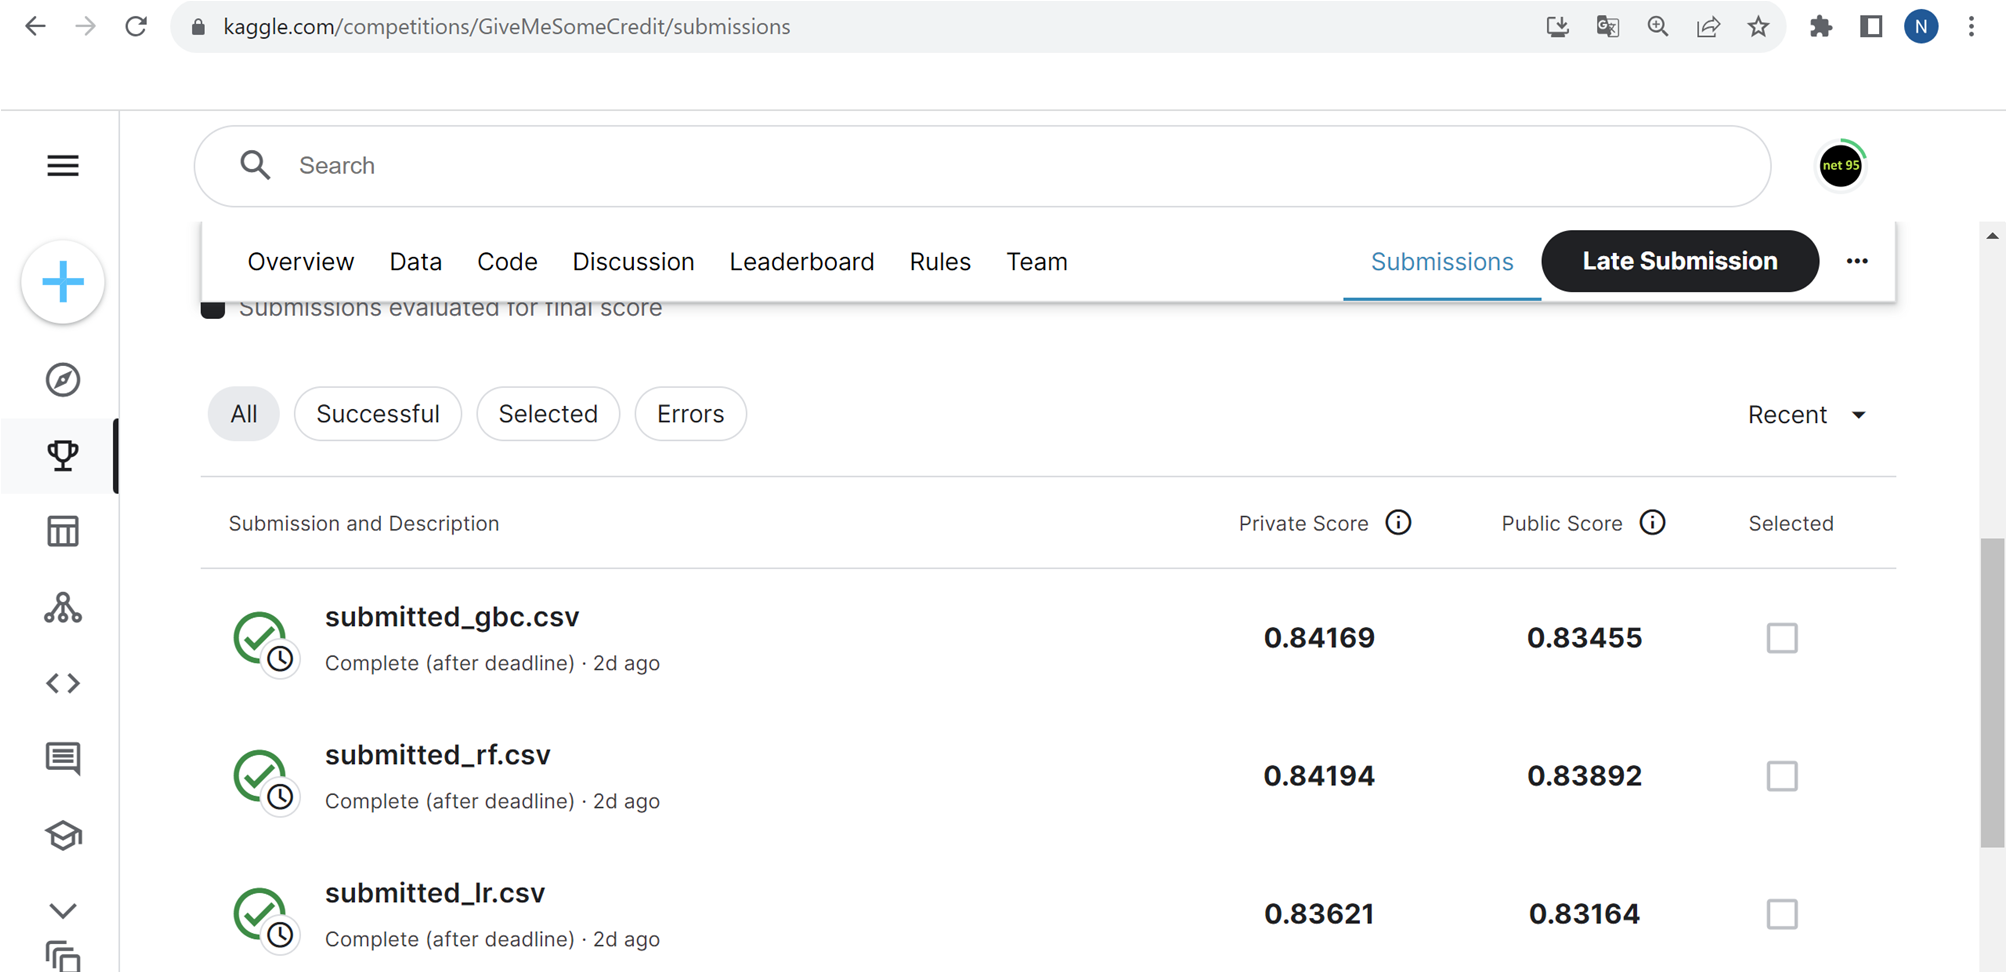

#### And as a conclusion we can say that these solutions are stable and they work propoerly both on train, test, public and private score tests
Note:
- submitted_rf - RandomForest
- submitted_gbc - GradientBoostingClassifier
- submitted_lr - LogisticRegression